<img src="https://www.python.org/static/img/python-logo.png" width="300" alt="Python logo"  />
<font color='blue'>$\Large\text{Social Data Consulting}$</font>

$$\large\textbf{Árboles de Decisión y Random Forest}$$

_Instructor: Sergio LM_
___

### __1. Árboles de Decisión__

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bu = pd.read_excel('diabetes_py.xlsx')

In [ ]:
bu.head()

,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199
3,1,90,323,240
4,1,86,381,157


In [ ]:
bu.isnull().sum()

clase       0
glucosa     0
insulina    0
sspg        0
dtype: int64

In [ ]:
bu.shape

(115, 4)

In [ ]:
bu['clase'].value_counts().index

Int64Index([1, 2, 3], dtype='int64')

- 1: Sana
- 2: Prediabetes
- 3: Diabetes

In [ ]:
np.unique(bu['clase'])

array([1, 2, 3])

In [ ]:
# Variables predictoras y variable objetivo

x = bu.iloc[:,1:3].values
y = bu.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,
                                                   stratify=y, random_state=2021)

In [ ]:
# Inicializar o coonfigurar el modelo

tree = DecisionTreeClassifier(criterion='entropy',  # medida de impureza
                             min_samples_split=20, # observaciones del nodo
                             max_depth=3,  # profundidad del arbol
                             random_state=2021)  # semilla

In [ ]:
# Validacion cruzada (cross validation)
from sklearn.model_selection import cross_val_score

<img src='https://www.mltut.com/wp-content/uploads/2020/05/cross-validation.png'></img>

In [ ]:
scores = cross_val_score(tree, 
                        x_train,
                        y_train,
                        scoring='accuracy',
                        cv=20)

/home/sergio/anaconda3/envs/ia/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 16 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
scores

array([1.  , 0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  , 0.75, 1.  ])

In [ ]:
scores.mean()

0.9625

In [ ]:
# entrenar el modelo
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20,
                       random_state=2021)

In [ ]:
tree.score(x_train, y_train)

0.9875

In [ ]:
tree.score(x_test, y_test)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Predicciones

y_pred = tree.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  7]])

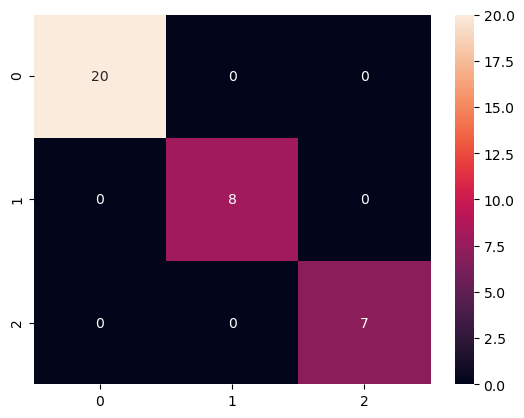

In [ ]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
x_t = pd.DataFrame(x_train, columns=['glucosa', 'insulina'])

y_t = pd.DataFrame(y_train, columns=['clase'])

In [ ]:
bu_train = pd.concat([x_t, y_t], 1)

/home/sergio/anaconda3/envs/ia/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
bu_train.head()

,glucosa,insulina,clase
0,112,568,2
1,99,376,1
2,99,359,1
3,93,364,1
4,138,741,3


In [ ]:
colnames = bu_train.columns.tolist()
colnames

['glucosa', 'insulina', 'clase']

In [ ]:
predictors = colnames[0:2]
predictors

['glucosa', 'insulina']

In [ ]:
with open('arbol_bu.dot','w') as dotfile:
    export_graphviz(tree,  # modelo
                   out_file=dotfile,
                   feature_names=predictors)

In [ ]:
file = open('arbol_bu.dot','r')
text = file.read()

In [ ]:
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="insulina <= 420.5\\nentropy = 1.408\\nsamples = 80\\nvalue = [46, 18, 16]"] ;\n1 [label="entropy = 0.0\\nsamples = 45\\nvalue = [45, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="glucosa <= 117.0\\nentropy = 1.156\\nsamples = 35\\nvalue = [1, 18, 16]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.297\\nsamples = 19\\nvalue = [1, 18, 0]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 16\\nvalue = [0, 0, 16]"] ;\n2 -> 4 ;\n}'

In [ ]:
from IPython.display import Image
from pydotplus import graph_from_dot_data

In [ ]:
dot_data = export_graphviz(tree,
                          feature_names=predictors)

In [ ]:
graph = graph_from_dot_data(dot_data)

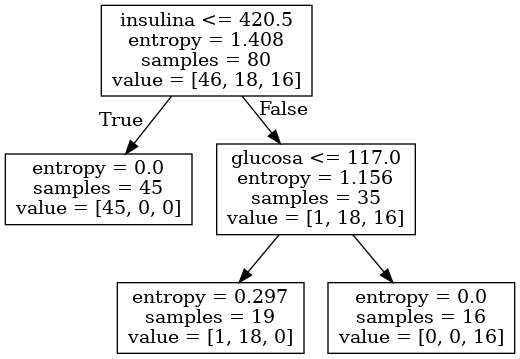

In [ ]:
Image(graph.create_png())

y = clase (1:sano, 2:prediabtes, 3:diabtes)
x1 = insulina
x2 = glucosa

* Nodo terminal 1
>- Pr(y=1 | x1<=420.5) = 45/samples = 45/45 = 1
>- Pr(y=2 | x1<=420.5) = 0
>- Pr(y=3 | x1<=420.5) = 0

* Nodo terminal 2
>- Pr(y=1 | x1>420.5 & x2<=117) = 1/19 = 0.05
>- Pr(y=2 | x1>420.5 & x2<=117) = 18/19 = 0.95
>- Pr(y=3 | x1>420.5 & x2<=117) = 0/19 = 0

* Nodo terminal 3
>- Pr(y=1 | x1>420.5 & x2>117) = 0
>- Pr(y=2 | x1>420.5 & x2>117) = 0
>- Pr(y=3 | x1>420.5 & x2>117) = 1

x1 (insulina) = 450, x2 (glucosa) = 100

In [ ]:
x_comb = np.vstack((x_train, x_test))
y_comb = np.hstack((y_train, y_test))

In [ ]:
from mlxtend.plotting import plot_decision_regions

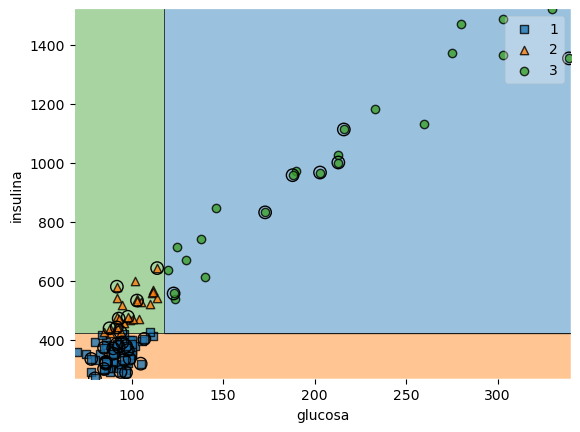

In [ ]:
plot_decision_regions(x_comb, y_comb, clf=tree, X_highlight=x_test)
plt.xlabel('glucosa')
plt.ylabel('insulina')
plt.show()

### __2. Random Forest__

- 10k observaciones o regitros
- 36 variables predictoras
- target o variable objetivo

$$m = \sqrt(36) = 6$$

* Modelo 1: x1, x5, x9, x15, x20, x25
* Modelo 2: x4, x9, x12, x21, x28, x30
* .
* .
* .
* Modelo 100: x6, x12, x18, x24, x30, x36

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
white_wine =  pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
white_wine['wine_type'] = 'white'
red_wine['wine_type'] = 'red'

In [ ]:
wines = pd.concat([red_wine, white_wine])

In [ ]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
wines['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
quality = lambda value: 'low' if value <=5 else 'medium' if value <= 7 else 'high'

In [ ]:
quality(9)

'high'

In [ ]:
wines['quality_label'] = wines['quality'].apply(quality)

In [ ]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [ ]:
wines['quality_label'].value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

In [ ]:
# Preparar datos

wqp_fetures = wines.iloc[:,:-3]

In [ ]:
wqp_fetures.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
quality_label           0
dtype: int64

In [ ]:
wqp_class_labels = np.array(wines['quality_label'])

In [ ]:
wqp_label_names = list(wines['quality_label'].value_counts().index)

In [ ]:
wqp_label_names

['medium', 'low', 'high']

In [ ]:
wqp_feature_names = list(wqp_fetures.columns)
wqp_feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
wqp_train_x, wqp_test_x, wqp_train_y, wqp_test_y = train_test_split(wqp_fetures,
                                                                   wqp_class_labels,
                                                                   test_size=0.3,
                                                                   random_state=2021)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Escalar las variables

wqp_ss = StandardScaler().fit(wqp_train_x)

In [ ]:
wqp_train_SX = wqp_ss.transform(wqp_train_x)

In [ ]:
wqp_test_SX = wqp_ss.transform(wqp_test_x)

In [ ]:
wqp_dt = DecisionTreeClassifier(criterion='entropy',
                               min_samples_split=400,
                               max_depth=4,
                               random_state=2021)

In [ ]:
scores = cross_val_score(wqp_dt, 
                        wqp_train_SX,
                        wqp_train_y,
                        scoring='accuracy',
                        cv=20)

In [ ]:
scores

array([0.75      , 0.70175439, 0.73245614, 0.67105263, 0.70175439,
       0.68859649, 0.68859649, 0.67400881, 0.71806167, 0.72246696,
       0.70044053, 0.68281938, 0.75330396, 0.73568282, 0.70484581,
       0.66960352, 0.74889868, 0.70044053, 0.68281938, 0.66079295])

In [ ]:
scores.mean()

0.704419777417111

In [ ]:
wqp_dt.fit(wqp_train_SX, wqp_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=400,
                       random_state=2021)

In [ ]:
wqp_dt_pred = wqp_dt.predict(wqp_test_SX)

In [ ]:
accuracy_score(wqp_test_y, wqp_dt_pred)

0.6907692307692308

In [ ]:
confusion_matrix(wqp_test_y, wqp_dt_pred)

array([[  0,   1,  75],
       [  0, 451, 269],
       [  0, 258, 896]])

In [ ]:
import model_evaluation_utils as meu

In [ ]:
meu.display_model_performance_metrics(true_labels=wqp_test_y,
                                     predicted_labels=wqp_dt_pred,
                                     classes=wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.6908
Precision: 0.6622
Recall: 0.6908
F1 Score: 0.6759

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      medium       0.72      0.78      0.75      1154
         low       0.64      0.63      0.63       720
        high       0.00      0.00      0.00        76

    accuracy                           0.69      1950
   macro avg       0.45      0.47      0.46      1950
weighted avg       0.66      0.69      0.68      1950


Prediction Confusion Matrix:
------------------------------


/home/sergio/anaconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/ia/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anacond

TypeError: __new__() got an unexpected keyword argument 'labels'

In [ ]:
# Usando random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inicizalizar o configurar el modelo
wqp_rf = RandomForestClassifier(random_state=123)

In [ ]:
#  Entrenar el modelo
wqp_rf.fit(wqp_train_SX, wqp_train_y)

RandomForestClassifier(random_state=123)

In [ ]:
wqp_rf_pred = wqp_rf.predict(wqp_test_SX)

In [ ]:
meu.display_model_performance_metrics(true_labels=wqp_test_y,
                                     predicted_labels=wqp_rf_pred,
                                     classes=wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7959
Precision: 0.803
Recall: 0.7959
F1 Score: 0.7884

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      medium       0.79      0.90      0.84      1154
         low       0.81      0.67      0.74       720
        high       1.00      0.34      0.51        76

    accuracy                           0.80      1950
   macro avg       0.87      0.64      0.70      1950
weighted avg       0.80      0.80      0.79      1950


Prediction Confusion Matrix:
------------------------------


TypeError: __new__() got an unexpected keyword argument 'labels'

In [ ]:
confusion_matrix(wqp_test_y, wqp_rf_pred)

array([[  26,    0,   50],
       [   0,  485,  235],
       [   0,  113, 1041]])

In [ ]:
# Random Forest con H2O

In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.20.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.20.04, mixed mode, sharing)
  Starting server from /home/sergio/anaconda3/envs/ia/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps4xs5pnm
  JVM stdout: /tmp/tmps4xs5pnm/h2o_sergio_started_from_python.out
  JVM stderr: /tmp/tmps4xs5pnm/h2o_sergio_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_sergio_d39rqt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,958 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [ ]:
fileCSV = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [ ]:
dataCSV = pd.read_csv(fileCSV, header=None)

In [ ]:
dataCSV.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataCSV.columns = ['c1','c2','c3','c4','c5']

In [ ]:
dataCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      150 non-null    float64
 1   c2      150 non-null    float64
 2   c3      150 non-null    float64
 3   c4      150 non-null    float64
 4   c5      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataCSV['c5'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: c5, dtype: int64

In [ ]:
type(dataCSV)

pandas.core.frame.DataFrame

In [ ]:
data = h2o.H2OFrame(dataCSV)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
type(data)

h2o.frame.H2OFrame

In [ ]:
data.col_names

['c1', 'c2', 'c3', 'c4', 'c5']

In [ ]:
train, test = data.split_frame(ratios=[0.8], seed=2021)

In [ ]:
# Definir el modelo

model = H2ORandomForestEstimator(ntrees=50, 
                                max_depth=2,
                                seed=0,
                                nfolds=10)

In [ ]:
# Entrenar el modelo

model.train(x=['c1', 'c2', 'c3', 'c4'],
           y='c5',
           training_frame=train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1638931623198_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,150.0,14766.0,1.0,2.0,1.733333,2.0,4.0,3.18




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.03171462722844701
RMSE: 0.17808601076010155
LogLoss: 0.1322863666123644
Mean Per-Class Error: 0.031411677753141166
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,40.0,0.0,0.0,0.000000,0 / 40
1,0.0,39.0,2.0,0.048780,2 / 41
2,0.0,2.0,42.0,0.045455,2 / 44
3,40.0,41.0,44.0,0.032000,4 / 125



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.968
1,2,1.000
2,3,1.000



ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.03796385086336191
RMSE: 0.1948431442554803
LogLoss: 0.14938770113454233
Mean Per-Class Error: 0.04009608277900961
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,40.0,0.0,0.0,0.000000,0 / 40
1,0.0,37.0,4.0,0.097561,4 / 41
2,0.0,1.0,43.0,0.022727,1 / 44
3,40.0,38.0,47.0,0.040000,5 / 125



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.96
1,2,1.00
2,3,1.00



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.965909,0.059034,1.000000,0.916667,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,0.909091,1.000000
1,auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,err,0.034091,0.059034,0.000000,0.083333,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.090909,0.000000
3,err_count,0.500000,0.849837,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,logloss,0.142210,0.084004,0.117667,0.184107,0.083266,0.133702,0.300376,0.045578,0.135051,0.055807,0.261893,0.104655
5,max_per_class_error,0.075000,0.120761,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000
6,mean_per_class_accuracy,0.968333,0.054120,1.000000,0.916667,1.000000,1.000000,0.850000,1.000000,1.000000,1.000000,0.916667,1.000000
7,mean_per_class_error,0.031667,0.054120,0.000000,0.083333,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.083333,0.000000
8,mse,0.036185,0.032943,0.018995,0.048712,0.012511,0.031827,0.105238,0.004146,0.033069,0.004919,0.078616,0.023819
9,pr_auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc
0,,2021-12-07 21:58:06,6.666 sec,0.0,NaN,NaN,NaN,NaN,NaN
1,,2021-12-07 21:58:06,6.685 sec,1.0,0.221572,0.173635,0.054054,NaN,NaN
2,,2021-12-07 21:58:06,6.692 sec,2.0,0.143810,0.075804,0.028986,NaN,NaN
3,,2021-12-07 21:58:06,6.707 sec,3.0,0.215639,0.502248,0.054348,NaN,NaN
4,,2021-12-07 21:58:06,6.715 sec,4.0,0.209873,0.464472,0.038462,NaN,NaN
5,,2021-12-07 21:58:06,6.722 sec,5.0,0.232174,0.750393,0.053571,NaN,NaN
6,,2021-12-07 21:58:06,6.730 sec,6.0,0.198680,0.419209,0.034783,NaN,NaN
7,,2021-12-07 21:58:06,6.743 sec,7.0,0.220357,0.441560,0.050847,NaN,NaN
8,,2021-12-07 21:58:06,6.750 sec,8.0,0.210249,0.421634,0.049180,NaN,NaN
9,,2021-12-07 21:58:06,6.757 sec,9.0,0.212724,0.424622,0.048387,NaN,NaN



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,c4,1578.545288,1.000000,0.483649
1,c3,1224.411499,0.775658,0.375146
2,c1,298.781494,0.189276,0.091543
3,c2,162.086304,0.102681,0.049661


In [ ]:
performance = model.model_performance(train)

In [ ]:
performance


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.023260950703913996
RMSE: 0.15251541136525842
LogLoss: 0.10869091090919265
Mean Per-Class Error: 0.016260162601626018
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,40.0,0.0,0.0,0.00000,0 / 40
1,0.0,39.0,2.0,0.04878,2 / 41
2,0.0,0.0,44.0,0.00000,0 / 44
3,40.0,39.0,46.0,0.01600,2 / 125



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.984
1,2,1.000
2,3,1.000


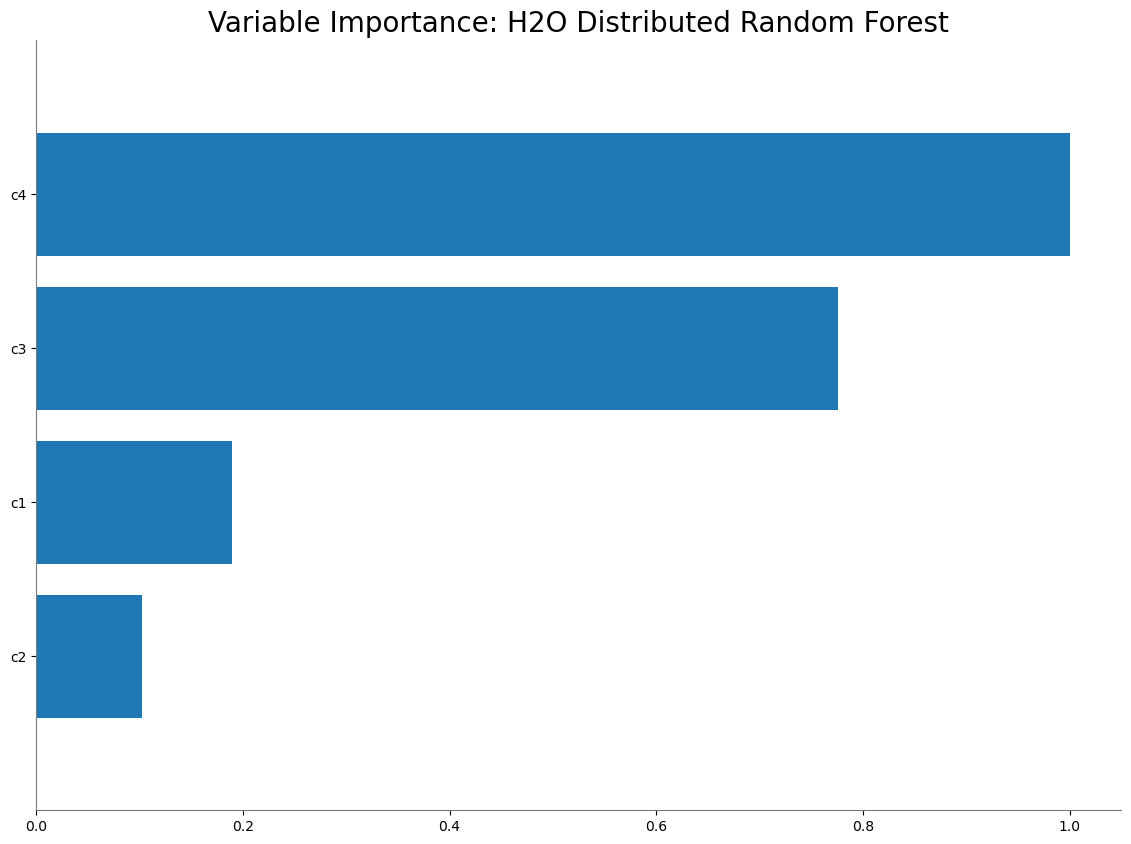

In [ ]:
model.varimp_plot()